In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::combine()    masks gridExtra::combine()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [36]:
sample_data <- readRDS('./Rdata/sample_data_3DM_shoots_DMs_JC14_adr1s_pathogen.rds')

In [51]:
sample_data_simple <- sample_data %>% as.data.frame %>% tibble::rownames_to_column(var = "sample") %>% dplyr::select(sample,group2)

## import WGCNA results

In [64]:
connectivity_table_info <- readRDS("../Pathogen_JC14_3DM/WGCNA_output_all/RDS/connectivity_info.rds") %>% 
  mutate(across(c(module), 
                ~gsub("MEcyan", "MEruby", .)))

In [66]:
z_assay_3DM_pathogen_JC14 <- readRDS('./Rdata/z_assay.Rds') %>% as.data.frame %>% tibble::rownames_to_column(var = "AGI")
z_assay_3DM_pathogen_JC14 %>% sample_n(10)

AGI,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,Col-0_14_1,DM6/DM7_2,Col-0_14_2,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT1G05153,-1.1049738,-1.1049738,-1.1049738,-1.0052899,-1.1049738,-1.1049738,-1.0132372,-1.1049738,-1.1049738,⋯,-1.0216559,-1.1049738,-1.1049738,-0.9716840,-1.1049738,-1.1049738,-1.1049738,-1.1049738,-1.1049738,-1.1049738
AT5G08360,-0.4039501,-0.6799723,-0.4801044,-0.5875297,-0.4728442,-0.3688284,-0.6399896,-0.3931834,-0.6583262,⋯,-0.4656704,-0.5937536,-0.6106502,-0.5544416,-0.4851362,-0.4909818,-0.5444491,-0.5123789,-0.5911525,-0.5538967
AT2G33180,-0.3039439,0.9639204,-0.2671710,0.8782699,-0.2506218,0.6340651,1.3926925,0.6076259,1.3596741,⋯,0.5259449,1.1154516,1.1437497,1.1353961,0.4999179,0.5225426,0.4248817,0.6492219,0.6277772,0.6649189
AT1G54250,0.3609629,0.2199402,0.3702983,0.1646361,0.4325375,0.3068145,0.2453516,0.3635735,0.1152859,⋯,0.3564665,0.1723143,0.1757717,0.1420849,0.2185760,0.2032422,0.2215090,0.2000859,0.2050514,0.2813111
AT4G13810,0.3664453,0.5041997,0.3970342,0.4495418,0.4136744,1.1731760,0.5483349,1.2660607,0.7821956,⋯,-0.4778711,0.2768624,0.4013433,0.3181609,-0.5344115,-0.5595107,-0.5339938,-0.4913978,-0.6053044,-0.4242173
AT1G15240,1.1517646,0.7784616,1.0605408,0.7249064,0.9906587,0.9496255,0.7914611,1.0423129,0.8180121,⋯,0.9883576,0.8875113,0.8820329,0.8631858,1.1186051,1.1387299,1.1872073,1.0972020,1.0969907,1.0710609
AT1G74190,-0.9853010,-1.0257004,-1.0333042,-0.9898972,-1.0051597,-1.1049738,-1.1049738,-1.1049738,-1.1049738,⋯,-1.1049738,-1.0220760,-1.1049738,-1.1049738,-1.0148294,-1.1049738,-1.1049738,-1.0153411,-1.0428010,-1.1049738
AT3G16680,-1.1049738,-0.9929169,-1.1049738,-0.9898972,-1.1049738,-0.9532270,-1.1049738,-1.1049738,-1.1049738,⋯,-1.0216559,-0.9877987,-0.9363523,-0.9857241,-1.1049738,-1.1049738,-0.9735072,-1.1049738,-1.1049738,-0.9642622
AT4G04015,-0.9505868,-0.8153879,-0.9917193,-0.7486840,-0.9473295,-0.9810021,-1.0400858,-1.1049738,-1.0408812,⋯,-0.9285492,-0.9740016,-1.0205287,-0.9716840,-0.8848308,-0.9382541,-1.0391768,-0.9375370,-0.9088740,-1.0419711


In [67]:
z_assay_WGCNA <- connectivity_table_info %>% dplyr::select( c('gene', 'connectivity_rowSums_adj', 'module', 'gene_name')) %>%
    left_join(z_assay_3DM_pathogen_JC14, by = c("gene" = "AGI")) 

In [68]:
z_assay_WGCNA %>%
  pivot_longer(
    cols = -c(gene, connectivity_rowSums_adj, module, gene_name),
    names_to = "sample",
    values_to = "z_score"
  ) %>% 
  left_join(sample_data_simple %>% dplyr::rename(group = group2), by = "sample") -> z_assay_WGCNA

In [69]:
z_assay_WGCNA

gene,connectivity_rowSums_adj,module,gene_name,sample,z_score,group
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
AT5G42010,1955.105,MEruby,AT5G42010,DM1/DM2d_1,0.6199332,DM1/DM2d
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_12_1,-0.2900249,Col-0_12
AT5G42010,1955.105,MEruby,AT5G42010,DM1/DM2d_2,0.6543358,DM1/DM2d
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_12_2,-0.2571748,Col-0_12
AT5G42010,1955.105,MEruby,AT5G42010,DM1/DM2d_3,0.5483419,DM1/DM2d
AT5G42010,1955.105,MEruby,AT5G42010,DM6/DM7_1,0.2133175,DM6/DM7
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_14_1,-0.4458380,Col-0_14
AT5G42010,1955.105,MEruby,AT5G42010,DM6/DM7_2,0.2658938,DM6/DM7
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_14_2,-0.3979133,Col-0_14


In [70]:
mean_z_WGCNA <- z_assay_WGCNA %>% group_by( module, group) %>% summarise(mean_z = mean(z_score))  %>%
    ungroup 

`summarise()` has grouped output by 'module'. You can override using the
`.groups` argument.


In [73]:
mean_z_WGCNA_two_module <- mean_z_WGCNA %>% filter(module %>% str_detect("MEruby|MEblue"))
mean_z_WGCNA_two_module

module,group,mean_z
<chr>,<chr>,<dbl>
MEblue,AvrRps4-12h,0.433703575
MEblue,AvrRps4-20h,0.476263138
MEblue,AvrRps4-6h,0.382957086
MEblue,AvrRpt2-12h,0.398331845
MEblue,AvrRpt2-20h,0.386457137
MEblue,AvrRpt2-6h,0.375654012
MEblue,Cdm-0,1.181056530
MEblue,Col-0_12,1.025337878
MEblue,Col-0_14,1.125465042


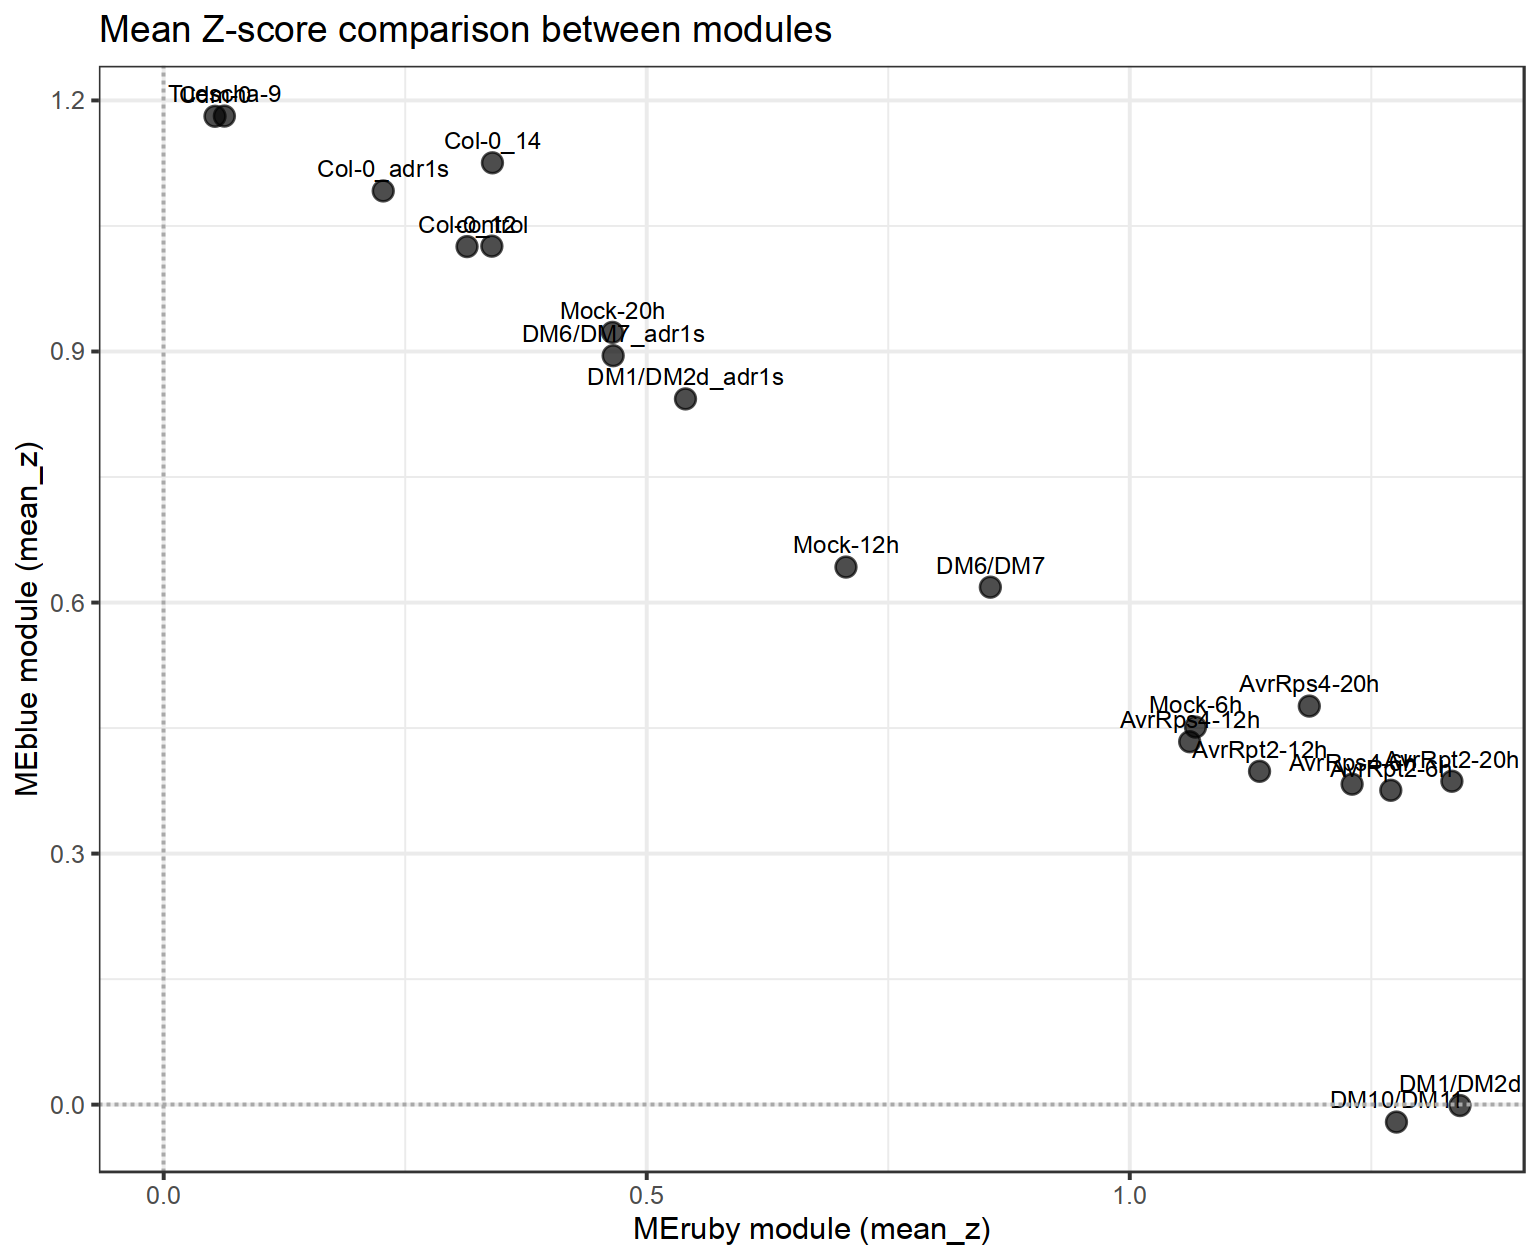

In [74]:
width_ = 7.7
height_ = 6.3
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 200)

# The data is already filtered for the two modules, so we need to reshape it
plot_data <- mean_z_WGCNA_two_module %>%
  pivot_wider(names_from = module, values_from = mean_z) %>%
  filter(!is.na(MEruby) & !is.na(MEblue))

# Create the dot plot
ggplot(plot_data, aes(x = MEruby, y = MEblue)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_text(aes(label = group), vjust = -0.8, hjust = 0.5, size = 3) +
  theme_bw() +
  labs(
    title = "Mean Z-score comparison between modules",
    x = "MEruby module (mean_z)",
    y = "MEblue module (mean_z)"
  ) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgray") + 
  geom_vline(xintercept = 0, linetype = "dashed", color = "darkgray")

### assay_vsd

In [81]:
assay_vsd <- readRDS('./Rdata/assay_vsd.rds') %>% as.data.frame %>% tibble::rownames_to_column(var = "AGI")
assay_vsd

AGI,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,Col-0_14_1,DM6/DM7_2,Col-0_14_2,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT1G30814,8.027459,7.361037,8.231559,7.144435,8.074163,7.852032,7.144435,8.095320,7.144435,⋯,7.924298,7.144435,7.144435,7.144435,8.832971,8.810619,8.828351,8.873718,8.679347,8.545464
AT1G78930,8.464617,9.151971,8.156042,9.324082,8.359510,8.724277,8.762498,8.571185,8.667057,⋯,9.984814,9.355599,9.678889,9.727031,9.124297,8.788743,9.097729,8.989016,9.111793,9.069351
AT1G71695,10.251630,13.073437,10.214103,13.408219,10.307029,11.177754,12.855112,10.469002,12.866455,⋯,11.938147,12.036633,12.092634,12.045693,11.687297,11.643531,11.612709,11.857049,11.656667,11.848610
AT1G58983,7.544247,7.430771,7.437918,7.366874,7.433572,7.599321,7.643801,7.550670,7.667345,⋯,8.034610,8.057067,7.958308,8.059219,7.856070,7.838879,7.681103,7.831371,7.775497,7.959753
AT1G12980,7.375758,7.534101,7.384200,7.301801,7.595411,7.522679,7.321758,7.557812,7.144435,⋯,7.537911,7.144435,7.144435,7.402079,7.533121,7.388260,7.144435,7.530925,7.559431,7.581978
AT1G56250,8.723562,8.616602,8.433975,9.578946,8.800437,8.168536,7.928274,7.685901,7.667345,⋯,8.430204,7.696430,7.307664,7.750478,9.546848,9.446720,9.522461,8.772799,8.887176,9.000544
AT1G66852,7.144435,7.144435,7.144435,7.144435,7.280913,7.144435,7.144435,7.144435,7.144435,⋯,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435
AT1G69810,9.357172,8.286904,9.334438,8.380507,9.223797,9.369673,8.359703,9.827488,8.060483,⋯,8.986850,8.302098,8.203795,8.197079,10.525551,10.732241,10.715571,10.022375,10.097646,10.008629
AT1G72450,11.667568,11.757335,11.520374,11.439797,11.522270,11.941032,11.965015,11.500723,12.197884,⋯,14.041862,12.025781,12.000418,11.755196,14.291855,14.348421,14.372119,14.165911,14.245614,14.022101


In [82]:
assay_vsd_WGCNA <- connectivity_table_info %>% dplyr::select( c('gene', 'connectivity_rowSums_adj', 'module', 'gene_name')) %>%
    left_join(assay_vsd, by = c("gene" = "AGI")) 
assay_vsd_WGCNA

gene,connectivity_rowSums_adj,module,gene_name,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT5G42010,1955.105,MEruby,AT5G42010,10.47862,8.719704,10.54512,8.783202,10.34024,9.692649,⋯,10.290784,8.791377,9.213629,8.781897,10.68194,10.78070,10.85320,10.280023,10.379105,10.231688
AT1G63720,1954.528,MEruby,AT1G63720,12.37682,9.108035,12.33604,9.078993,12.17984,9.924006,⋯,10.950910,8.856090,9.011583,8.919173,11.79962,11.76120,12.02457,11.682580,11.684110,11.566603
AT3G54150,1952.888,MEruby,EFD,13.16947,9.164861,13.09298,8.621679,13.08703,10.222659,⋯,11.943336,8.572208,9.088608,8.717299,13.05453,13.17192,13.19177,12.249167,12.307668,12.145049
AT5G48657,1947.970,MEruby,NOI10,12.65232,9.237575,12.55244,8.603823,12.40685,11.338103,⋯,11.259090,9.092550,9.352992,9.304306,12.10757,12.15166,12.23860,11.449518,11.329099,11.549188
AT4G23700,1947.948,MEruby,CHX17,14.79255,9.283221,14.62497,8.952127,14.40815,12.762709,⋯,13.139405,8.650075,8.553111,8.798319,14.39909,14.42554,14.36875,13.650653,13.598037,13.555039
AT1G16420,1947.471,MEruby,MC8,10.91841,8.349796,11.03429,7.914566,10.89028,9.123082,⋯,10.243679,8.364977,8.432983,8.253257,10.65332,10.97133,10.94188,10.188232,10.327590,10.081555
AT4G19370,1945.758,MEruby,MWL-2,10.96190,8.135922,10.93531,8.109574,10.74352,9.280662,⋯,10.650516,8.229421,8.215247,8.231198,11.26926,11.10193,11.21832,10.323764,10.196648,10.121954
AT2G30750,1945.046,MEruby,CYP71A12,15.41058,9.784139,15.03325,8.272454,14.78406,10.824454,⋯,14.040427,9.237413,10.084566,9.047815,15.18594,15.24315,15.38242,14.225593,14.411723,14.251919
AT1G08940,1944.577,MEruby,AT1G08940,11.41178,8.596169,11.44822,8.883425,11.33880,10.555988,⋯,11.182553,9.075107,9.245916,9.200262,11.97226,12.05941,12.19115,11.012552,11.217098,11.110235


In [83]:
assay_vsd_WGCNA %>%
  pivot_longer(
    cols = -c(gene, connectivity_rowSums_adj, module, gene_name),
    names_to = "sample",
    values_to = "counts"
  ) %>% 
  left_join(sample_data_simple %>% dplyr::rename(group = group2), by = "sample") -> assay_vsd_WGCNA

In [84]:
assay_vsd_WGCNA

gene,connectivity_rowSums_adj,module,gene_name,sample,counts,group
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
AT5G42010,1955.105,MEruby,AT5G42010,DM1/DM2d_1,10.478624,DM1/DM2d
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_12_1,8.719704,Col-0_12
AT5G42010,1955.105,MEruby,AT5G42010,DM1/DM2d_2,10.545123,DM1/DM2d
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_12_2,8.783202,Col-0_12
AT5G42010,1955.105,MEruby,AT5G42010,DM1/DM2d_3,10.340240,DM1/DM2d
AT5G42010,1955.105,MEruby,AT5G42010,DM6/DM7_1,9.692649,DM6/DM7
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_14_1,8.418523,Col-0_14
AT5G42010,1955.105,MEruby,AT5G42010,DM6/DM7_2,9.794277,DM6/DM7
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_14_2,8.511159,Col-0_14


In [85]:
median_assay_vsd_WGCNA <- assay_vsd_WGCNA %>% group_by( module, group) %>% summarise(median_counts = median(counts))  %>%
    ungroup 

`summarise()` has grouped output by 'module'. You can override using the
`.groups` argument.


In [92]:
mean_assay_vsd_WGCNA <- assay_vsd_WGCNA %>% group_by( module, group) %>% summarise(mean_counts = mean(counts))  %>% ungroup 

`summarise()` has grouped output by 'module'. You can override using the
`.groups` argument.


In [100]:
median_assay_vsd_WGCNA_two_module <- median_assay_vsd_WGCNA %>% filter(module %>% str_detect("MEruby|MEblue"))

In [99]:
mean_assay_vsd_WGCNA_two_module <- mean_assay_vsd_WGCNA %>% filter(module %>% str_detect("MEruby|MEblue"))

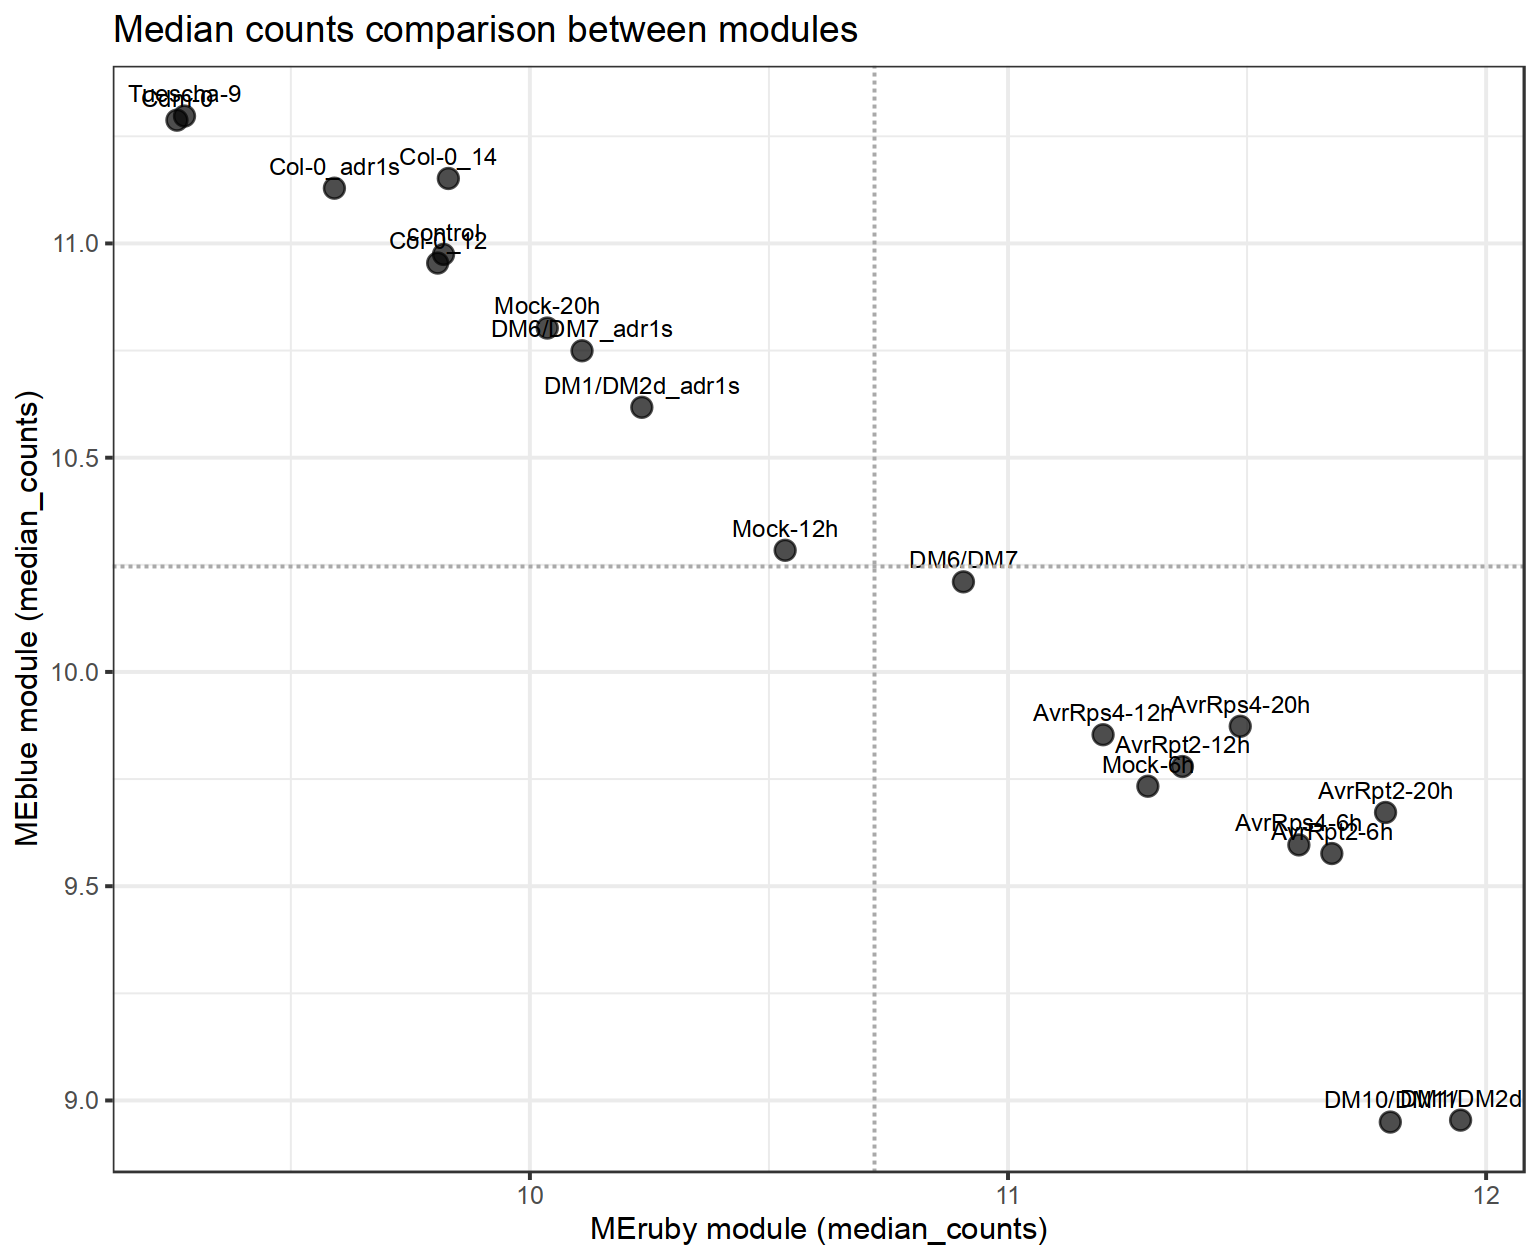

In [94]:
width_ = 7.7
height_ = 6.3
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 200)

# The data is already filtered for the two modules, so we need to reshape it
plot_data <- median_assay_vsd_WGCNA_two_module %>%
  pivot_wider(names_from = module, values_from = median_counts) %>%
  filter(!is.na(MEruby) & !is.na(MEblue))

# Create the dot plot
ggplot(plot_data, aes(x = MEruby, y = MEblue)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_text(aes(label = group), vjust = -0.8, hjust = 0.5, size = 3) +
  theme_bw() +
  labs(
    title = "Median counts comparison between modules",
    x = "MEruby module (median_counts)",
    y = "MEblue module (median_counts)"
  ) +
  geom_hline(yintercept = median(plot_data$MEblue), linetype = "dashed", color = "darkgray") + 
  geom_vline(xintercept = median(plot_data$MEruby), linetype = "dashed", color = "darkgray")

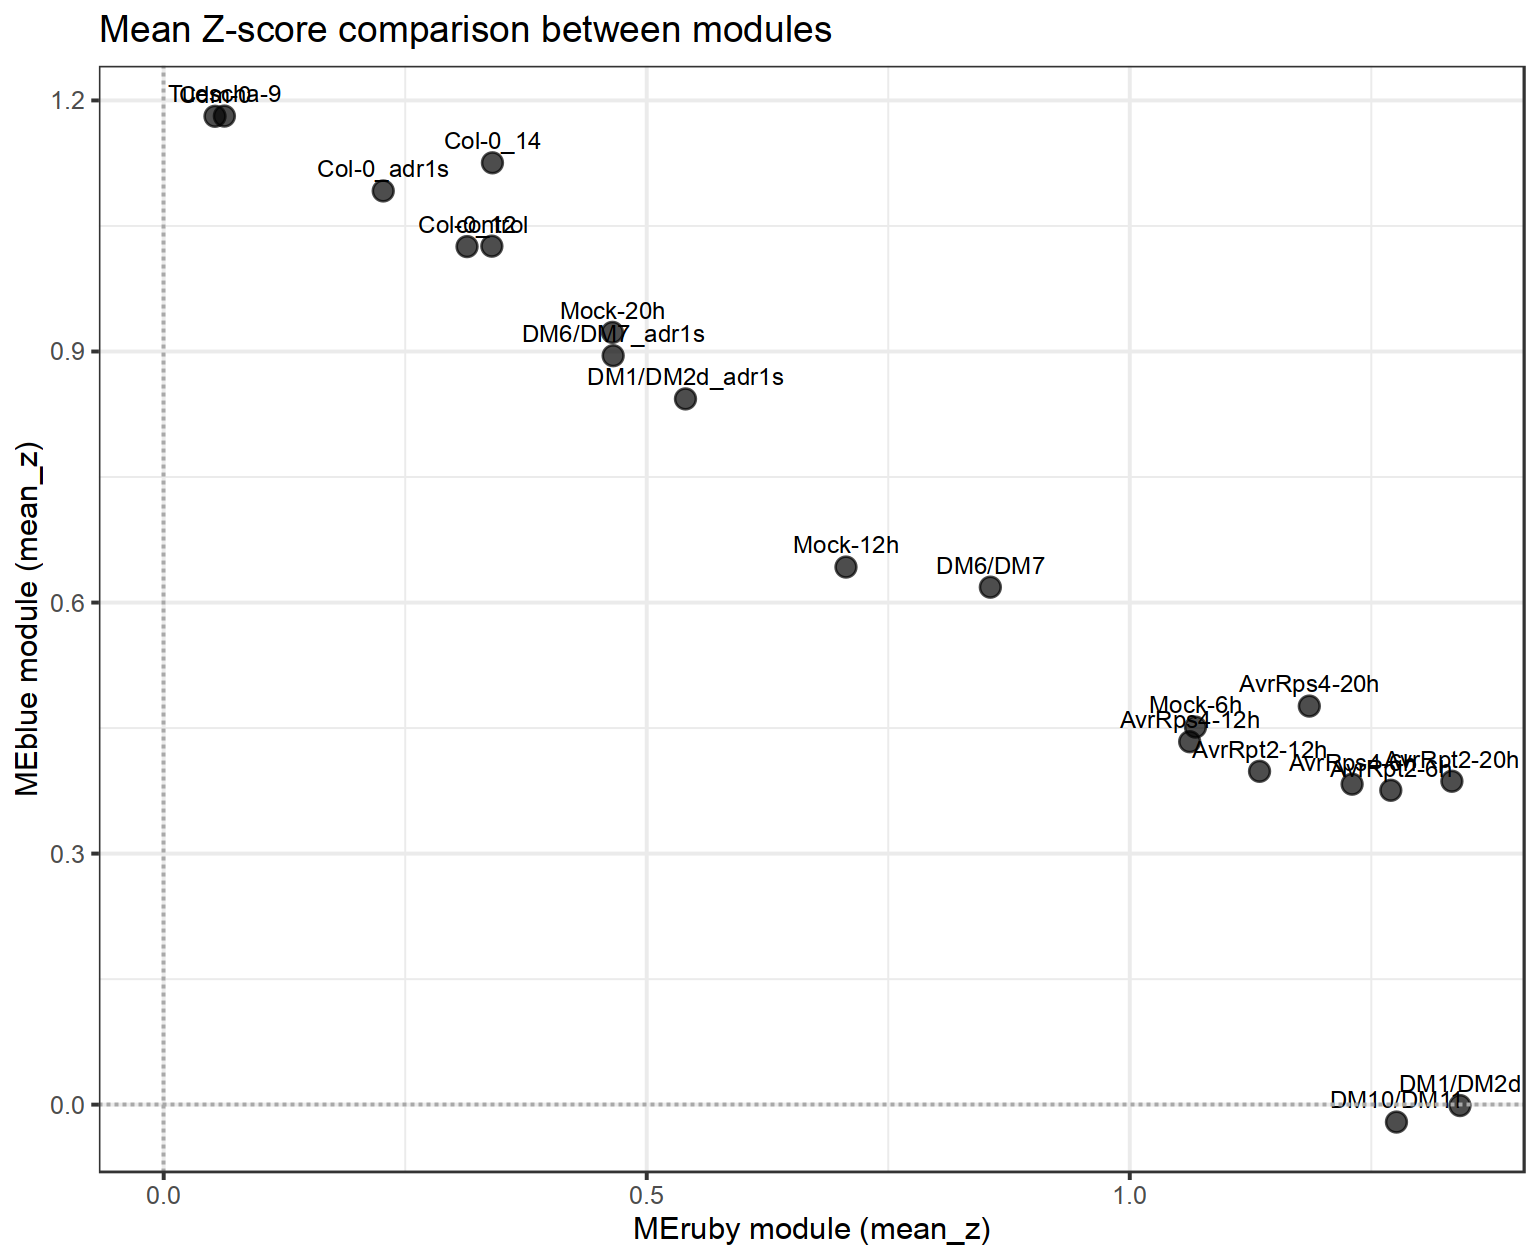

In [74]:
width_ = 7.7
height_ = 6.3
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 200)

# The data is already filtered for the two modules, so we need to reshape it
plot_data <- mean_z_WGCNA_two_module %>%
  pivot_wider(names_from = module, values_from = mean_z) %>%
  filter(!is.na(MEruby) & !is.na(MEblue))

# Create the dot plot
ggplot(plot_data, aes(x = MEruby, y = MEblue)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_text(aes(label = group), vjust = -0.8, hjust = 0.5, size = 3) +
  theme_bw() +
  labs(
    title = "Mean Z-score comparison between modules",
    x = "MEruby module (mean_z)",
    y = "MEblue module (mean_z)"
  ) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgray") + 
  geom_vline(xintercept = 0, linetype = "dashed", color = "darkgray")

In [98]:
mean_z_WGCNA %>% sample_n(20)

module,group,mean_z
<chr>,<chr>,<dbl>
MEpurple,AvrRps4-12h,0.5830326
MEtan,DM1/DM2d,0.8750428
MEpurple,DM6/DM7,1.0275493
MEpurple,Col-0_12,0.7317447
MEblue,AvrRps4-20h,0.4762631
MEdarkturquoise,AvrRpt2-12h,1.1901702
MEdarkturquoise,Cdm-0,0.7178651
MEmidnightblue,Mock-12h,0.1469461
MEdarkgreen,DM1/DM2d_adr1s,0.6461608


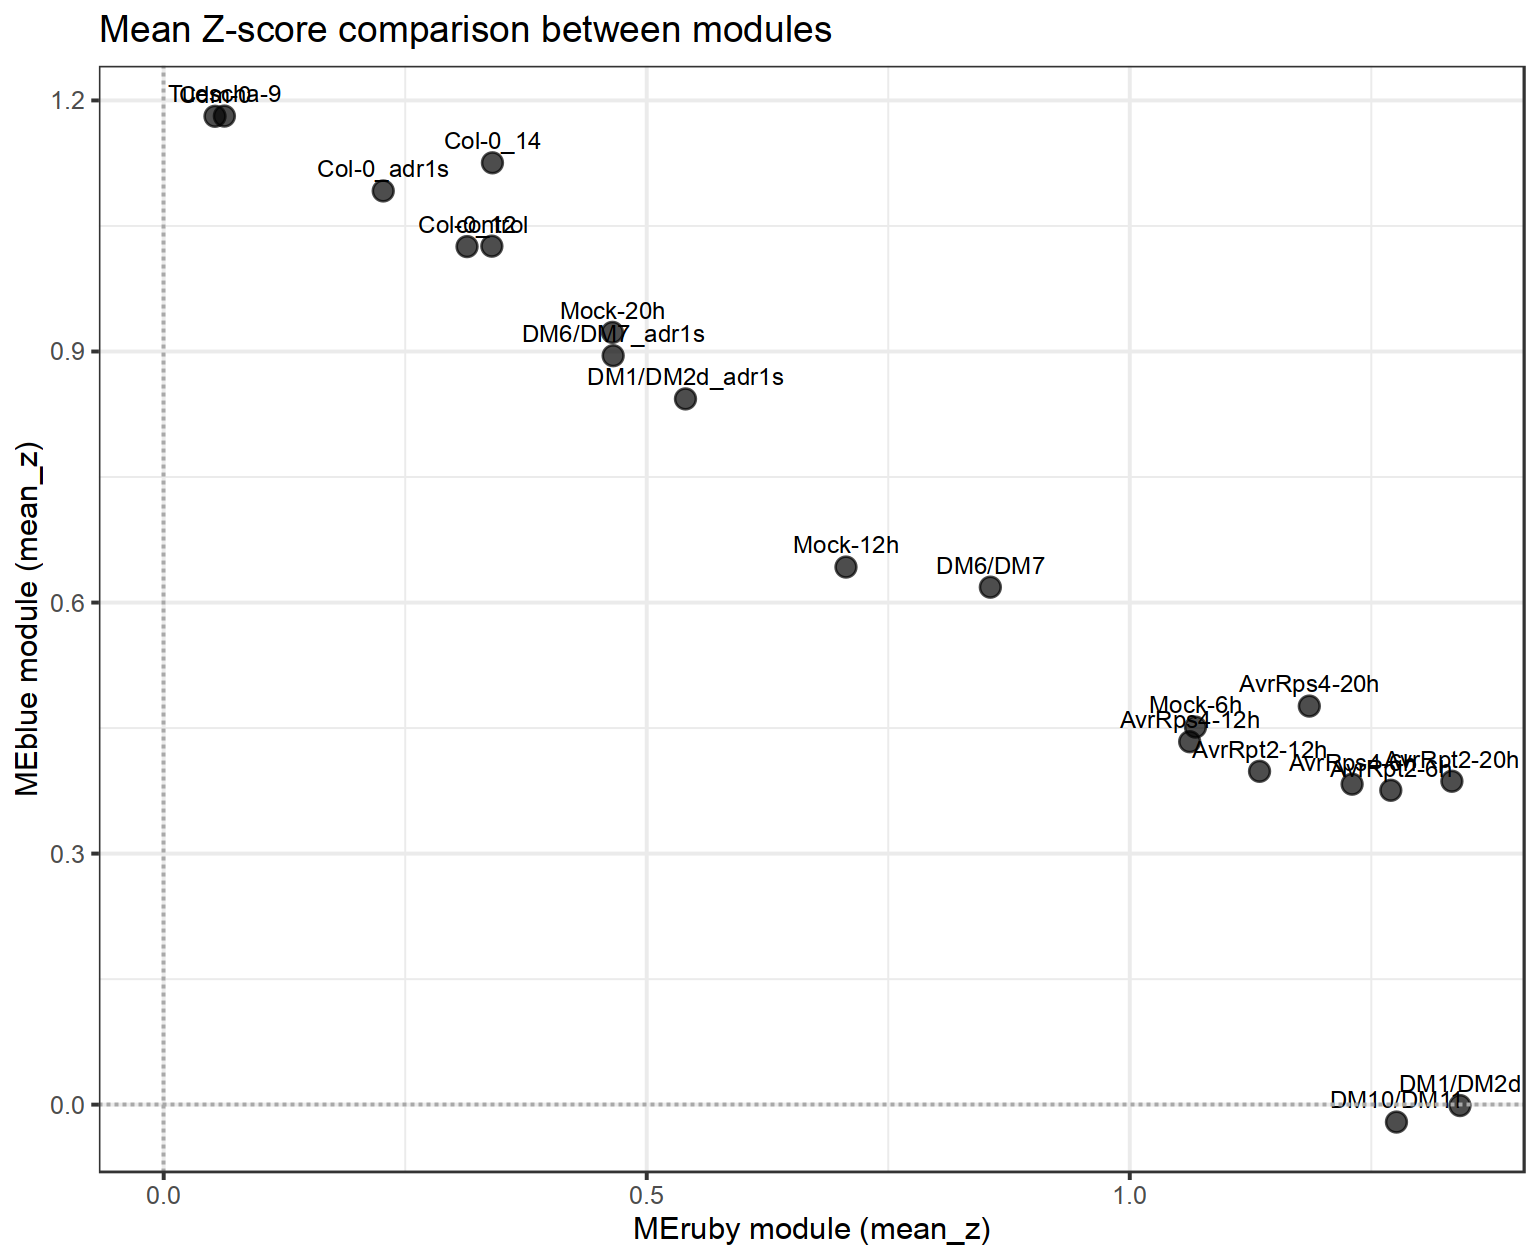

In [74]:
width_ = 7.7
height_ = 6.3
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 200)

# The data is already filtered for the two modules, so we need to reshape it
plot_data <- mean_z_WGCNA_two_module %>%
  pivot_wider(names_from = module, values_from = mean_z) %>%
  filter(!is.na(MEruby) & !is.na(MEblue))

# Create the dot plot
ggplot(plot_data, aes(x = MEruby, y = MEblue)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_text(aes(label = group), vjust = -0.8, hjust = 0.5, size = 3) +
  theme_bw() +
  labs(
    title = "Mean Z-score comparison between modules",
    x = "MEruby module (mean_z)",
    y = "MEblue module (mean_z)"
  ) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgray") + 
  geom_vline(xintercept = 0, linetype = "dashed", color = "darkgray")

### Another way for calculating Z-scores, column specific

In [105]:
assay_vsd# %>% scale() 

AGI,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,Col-0_14_1,DM6/DM7_2,Col-0_14_2,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT1G30814,8.027459,7.361037,8.231559,7.144435,8.074163,7.852032,7.144435,8.095320,7.144435,⋯,7.924298,7.144435,7.144435,7.144435,8.832971,8.810619,8.828351,8.873718,8.679347,8.545464
AT1G78930,8.464617,9.151971,8.156042,9.324082,8.359510,8.724277,8.762498,8.571185,8.667057,⋯,9.984814,9.355599,9.678889,9.727031,9.124297,8.788743,9.097729,8.989016,9.111793,9.069351
AT1G71695,10.251630,13.073437,10.214103,13.408219,10.307029,11.177754,12.855112,10.469002,12.866455,⋯,11.938147,12.036633,12.092634,12.045693,11.687297,11.643531,11.612709,11.857049,11.656667,11.848610
AT1G58983,7.544247,7.430771,7.437918,7.366874,7.433572,7.599321,7.643801,7.550670,7.667345,⋯,8.034610,8.057067,7.958308,8.059219,7.856070,7.838879,7.681103,7.831371,7.775497,7.959753
AT1G12980,7.375758,7.534101,7.384200,7.301801,7.595411,7.522679,7.321758,7.557812,7.144435,⋯,7.537911,7.144435,7.144435,7.402079,7.533121,7.388260,7.144435,7.530925,7.559431,7.581978
AT1G56250,8.723562,8.616602,8.433975,9.578946,8.800437,8.168536,7.928274,7.685901,7.667345,⋯,8.430204,7.696430,7.307664,7.750478,9.546848,9.446720,9.522461,8.772799,8.887176,9.000544
AT1G66852,7.144435,7.144435,7.144435,7.144435,7.280913,7.144435,7.144435,7.144435,7.144435,⋯,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435,7.144435
AT1G69810,9.357172,8.286904,9.334438,8.380507,9.223797,9.369673,8.359703,9.827488,8.060483,⋯,8.986850,8.302098,8.203795,8.197079,10.525551,10.732241,10.715571,10.022375,10.097646,10.008629
AT1G72450,11.667568,11.757335,11.520374,11.439797,11.522270,11.941032,11.965015,11.500723,12.197884,⋯,14.041862,12.025781,12.000418,11.755196,14.291855,14.348421,14.372119,14.165911,14.245614,14.022101


In [137]:
z_assay_WGCNA <- cbind(assay_vsd %>% dplyr::select("AGI"), assay_vsd %>% dplyr::select(-c("AGI")) %>% scale )

In [138]:
z_assay_WGCNA <- connectivity_table_info %>% dplyr::select( c('gene', 'connectivity_rowSums_adj', 'module', 'gene_name')) %>%
    left_join(z_assay_WGCNA, by = c("gene" = "AGI")) 

In [139]:
z_assay_WGCNA %>%
  pivot_longer(
    cols = -c(gene, connectivity_rowSums_adj, module, gene_name),
    names_to = "sample",
    values_to = "z_score"
  ) %>% 
  left_join(sample_data_simple %>% dplyr::rename(group = group2), by = "sample") -> z_assay_WGCNA

In [140]:
z_assay_WGCNA

gene,connectivity_rowSums_adj,module,gene_name,sample,z_score,group
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
AT5G42010,1955.105,MEruby,AT5G42010,DM1/DM2d_1,0.5370901,DM1/DM2d
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_12_1,-0.3162450,Col-0_12
AT5G42010,1955.105,MEruby,AT5G42010,DM1/DM2d_2,0.5768108,DM1/DM2d
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_12_2,-0.2748831,Col-0_12
AT5G42010,1955.105,MEruby,AT5G42010,DM1/DM2d_3,0.4819284,DM1/DM2d
AT5G42010,1955.105,MEruby,AT5G42010,DM6/DM7_1,0.2025546,DM6/DM7
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_14_1,-0.4531391,Col-0_14
AT5G42010,1955.105,MEruby,AT5G42010,DM6/DM7_2,0.2587869,DM6/DM7
AT5G42010,1955.105,MEruby,AT5G42010,Col-0_14_2,-0.4031377,Col-0_14


In [141]:
mean_z_WGCNA <- z_assay_WGCNA %>% group_by( module, group) %>% summarise(mean_z = mean(z_score))  %>%
    ungroup 

`summarise()` has grouped output by 'module'. You can override using the
`.groups` argument.


In [142]:
mean_z_WGCNA_two_module <- mean_z_WGCNA %>% filter(module %>% str_detect("MEruby|MEblue"))
mean_z_WGCNA_two_module

module,group,mean_z
<chr>,<chr>,<dbl>
MEblue,AvrRps4-12h,0.42854515
MEblue,AvrRps4-20h,0.43156115
MEblue,AvrRps4-6h,0.35381805
MEblue,AvrRpt2-12h,0.38797702
MEblue,AvrRpt2-20h,0.33264646
MEblue,AvrRpt2-6h,0.34133698
MEblue,Cdm-0,1.23527886
MEblue,Col-0_12,1.06265466
MEblue,Col-0_14,1.11809549


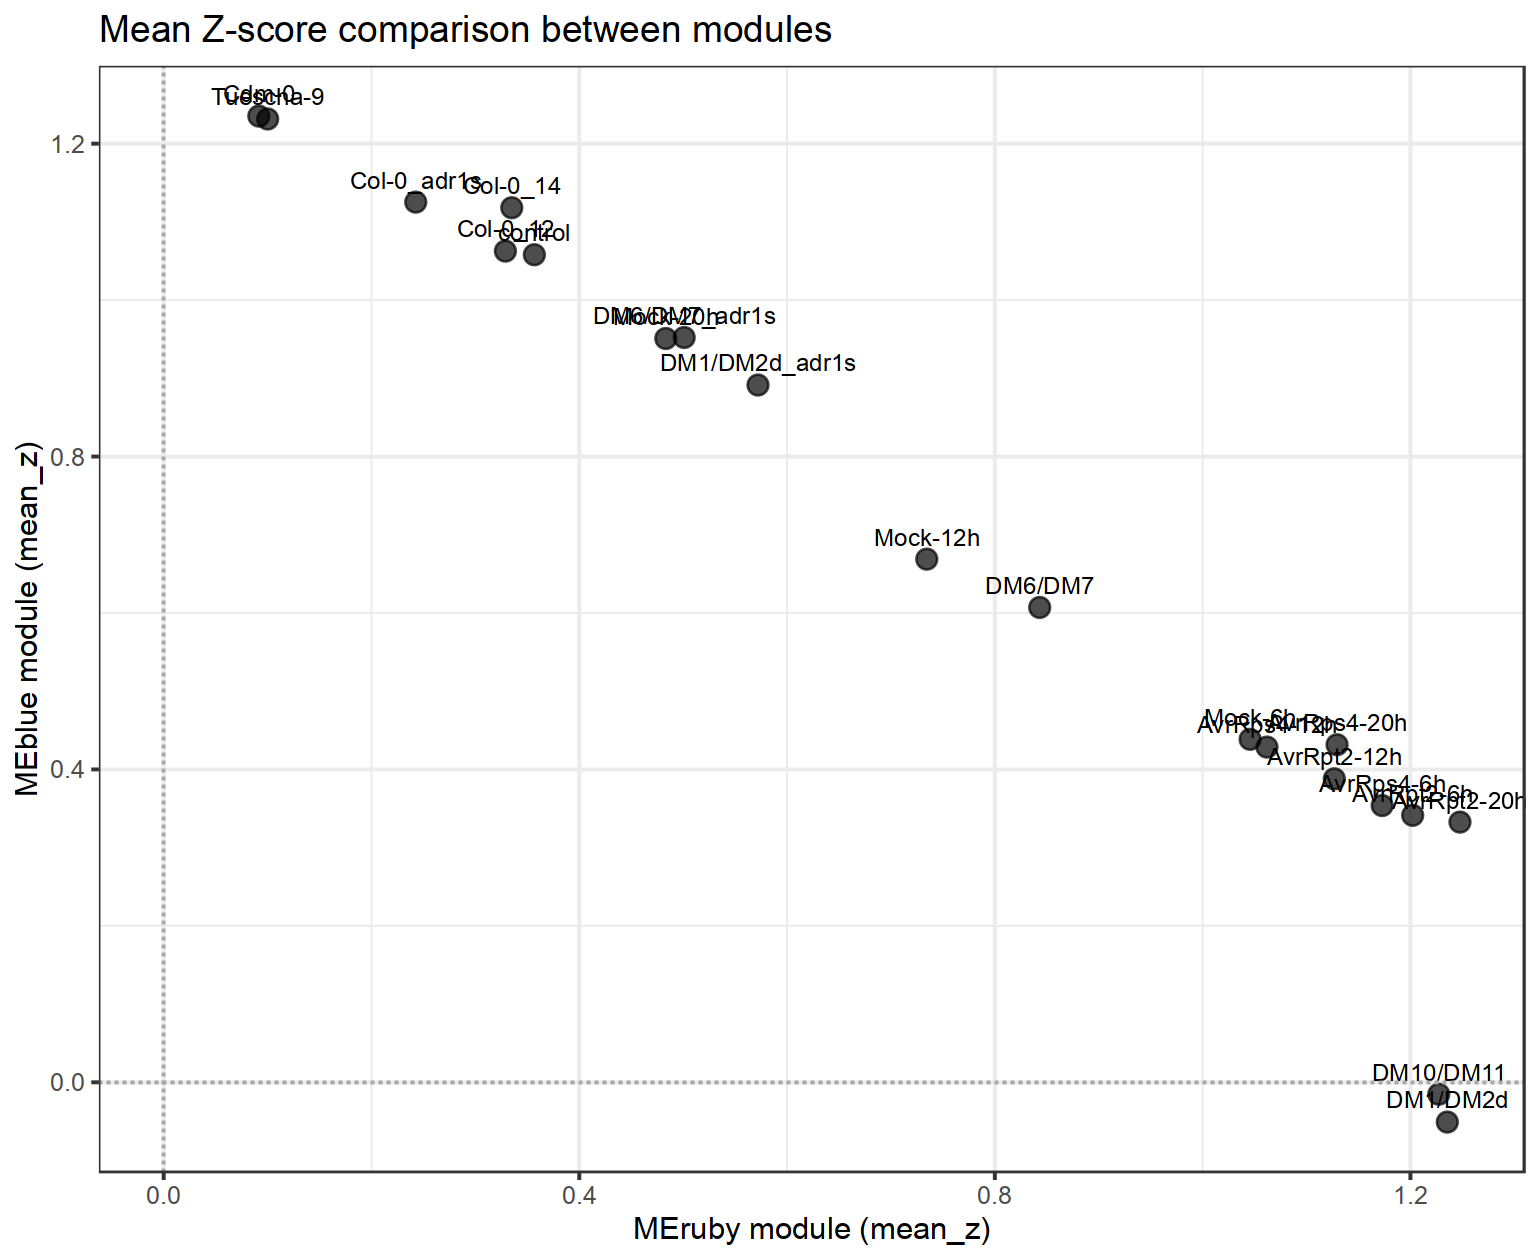

In [143]:
width_ = 7.7
height_ = 6.3
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 200)

# The data is already filtered for the two modules, so we need to reshape it
plot_data <- mean_z_WGCNA_two_module %>%
  pivot_wider(names_from = module, values_from = mean_z) %>%
  filter(!is.na(MEruby) & !is.na(MEblue))

# Create the dot plot
ggplot(plot_data, aes(x = MEruby, y = MEblue)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_text(aes(label = group), vjust = -0.8, hjust = 0.5, size = 3) +
  theme_bw() +
  labs(
    title = "Mean Z-score comparison between modules",
    x = "MEruby module (mean_z)",
    y = "MEblue module (mean_z)"
  ) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgray") + 
  geom_vline(xintercept = 0, linetype = "dashed", color = "darkgray")